# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [2]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [54]:
URL = 'https://api.hh.ru/vacancies'
professions = ["промышленный альпинист", "няня", "пекарь", "библиотекарь", "фармацевт"]
data = [requests.get(URL, { 'text': profession, 'area': 1, 'per_page': 100 }).json() for profession in professions]

In [66]:
columns = ['profession', 'name', 'employer', 'lat', 'lng']
df = pd.DataFrame(columns=columns)

In [67]:
for index, profession in enumerate(professions):
  for page in range(data[index]['pages']):
    vacancies = requests.get(URL,
     { 'text': profession, 'area': 1, 'per_page': 100, 'page': page }
                             ).json()['items']
    sleep(1)
    for vacancy in vacancies:
      description = [profession,
                     vacancy['name'],
                     vacancy['employer']['name'],
                     vacancy.get('address', np.nan).get('lat', np.nan) if vacancy['address'] != None else np.nan,
                     vacancy.get('address', np.nan).get('lng', np.nan) if vacancy['address'] != None else np.nan]
      df = pd.concat([df, pd.DataFrame(columns=columns,
                                      data = [description])],
                     ignore_index=True)

In [68]:
df

,profession,name,employer,lat,lng
0,промышленный альпинист,Промышленный альпинист,Вектор,NaN,NaN
1,промышленный альпинист,Маляр-альпинист,ВекФорт,NaN,NaN
2,промышленный альпинист,Промышленный альпинист,Сервис Руки,NaN,NaN
3,промышленный альпинист,Промышленный альпинист,ПромАльпЛидер,55.674885,37.734659
4,промышленный альпинист,Промышленный альпинист,Парсек,55.747586,37.531936
...,...,...,...,...,...
3164,фармацевт,Фармацевт/провизор (м. Сокольники),Аптечная сеть ЗДОРОВ.ру,55.789983,37.678523
3165,фармацевт,Фармацевт-провизор (м. Строгино),СБЕР (ООО еАптека),55.803489,37.407447
3166,фармацевт,Фармацевт/провизор (м. Чертановская),Аптечная сеть ЗДОРОВ.ру,55.640086,37.606514
3167,фармацевт,Фармацевт/провизор (м. Первомайская),Аптечная сеть ЗДОРОВ.ру,55.793556,37.801574


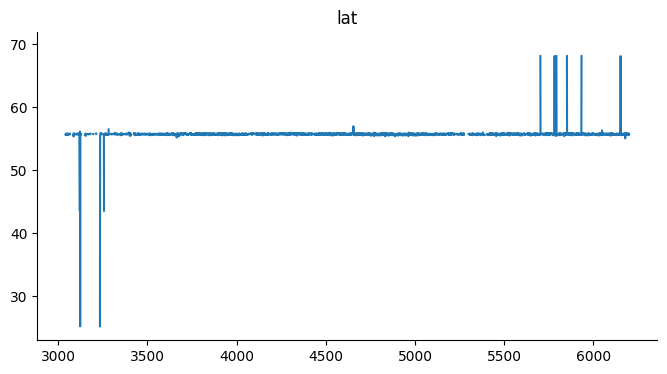

In [65]:
# @title lat

from matplotlib import pyplot as plt
df['lat'].plot(kind='line', figsize=(8, 4), title='lat')
plt.gca().spines[['top', 'right']].set_visible(False)

(1 балл) Посчитайте сколько всего найдено вакансий:

In [73]:
len(df)

3169

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [77]:
class Company:
  name = None
  lat = None
  lng = None
  def __init__(self, name):
    self.name = name

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [79]:
companies_names = df['employer'].unique()
companies = [Company(name) for name in companies_names]

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [86]:
vacancies_with_location = df[df['lng'].notna()]
len(vacancies_with_location)

2460

In [81]:
df.describe()

,lat,lng
count,2460.000000,2460.000000
mean,55.747571,37.672155
std,1.163944,3.075269
min,25.229762,7.264846
25%,55.681702,37.500621
50%,55.747719,37.599431
75%,55.805635,37.690835
max,69.702909,170.282543


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [87]:
mkad_km =  pd.DataFrame(columns=['km', 'lng', 'lat'], data=[
[1,37.842762,55.774558],
[2,37.842789,55.76522],
[3,37.842627,55.755723],
[4,37.841828,55.747399],
[5,37.841217,55.739103],
[6,37.840175,55.730482],
[7,37.83916,55.721939],
[8,37.837121,55.712203],
[9,37.83262,55.703048],
[10,37.829512,55.694287],
[11,37.831353,55.68529],
[12,37.834605,55.675945],
[13,37.837597,55.667752],
[14,37.839348,55.658667],
[15,37.833842,55.650053],
[16,37.824787,55.643713],
[17,37.814564,55.637347],
[18,37.802473,55.62913],
[19,37.794235,55.623758],
[20,37.781928,55.617713],
[21,37.771139,55.611755],
[22,37.758725,55.604956],
[23,37.747945,55.599677],
[24,37.734785,55.594143],
[25,37.723062,55.589234],
[26,37.709425,55.583983],
[27,37.696256,55.578834],
[28,37.683167,55.574019],
[29,37.668911,55.571999],
[30,37.647765,55.573093],
[31,37.633419,55.573928],
[32,37.616719,55.574732],
[33,37.60107,55.575816],
[34,37.586536,55.5778],
[35,37.571938,55.581271],
[36,37.555732,55.585143],
[37,37.545132,55.587509],
[38,37.526366,55.5922],
[39,37.516108,55.594728],
[40,37.502274,55.60249],
[41,37.49391,55.609685],
[42,37.484846,55.617424],
[43,37.474668,55.625801],
[44,37.469925,55.630207],
[45,37.456864,55.641041],
[46,37.448195,55.648794],
[47,37.441125,55.654675],
[48,37.434424,55.660424],
[49,37.42598,55.670701],
[50,37.418712,55.67994],
[51,37.414868,55.686873],
[52,37.407528,55.695697],
[53,37.397952,55.702805],
[54,37.388969,55.709657],
[55,37.383283,55.718273],
[56,37.378369,55.728581],
[57,37.374991,55.735201],
[58,37.370248,55.744789],
[59,37.369188,55.75435],
[60,37.369053,55.762936],
[61,37.369619,55.771444],
[62,37.369853,55.779722],
[63,37.372943,55.789542],
[64,37.379824,55.79723],
[65,37.386876,55.805796],
[66,37.390397,55.814629],
[67,37.393236,55.823606],
[68,37.395275,55.83251],
[69,37.394709,55.840376],
[70,37.393056,55.850141],
[71,37.397314,55.858801],
[72,37.405588,55.867051],
[73,37.416601,55.872703],
[74,37.429429,55.877041],
[75,37.443596,55.881091],
[76,37.459065,55.882828],
[77,37.473096,55.884625],
[78,37.48861,55.888897],
[79,37.5016,55.894232],
[80,37.513206,55.899578],
[81,37.527597,55.90526],
[82,37.543443,55.907687],
[83,37.559577,55.909388],
[84,37.575531,55.910907],
[85,37.590344,55.909257],
[86,37.604637,55.905472],
[87,37.619603,55.901637],
[88,37.635961,55.898533],
[89,37.647648,55.896973],
[90,37.667878,55.895449],
[91,37.681721,55.894868],
[92,37.698807,55.893884],
[93,37.712363,55.889094],
[94,37.723636,55.883555],
[95,37.735791,55.877501],
[96,37.741261,55.874698],
[97,37.764519,55.862464],
[98,37.765992,55.861979],
[99,37.788216,55.850257],
[100,37.788522,55.850383],
[101,37.800586,55.844167],
[102,37.822819,55.832707],
[103,37.829754,55.828789],
[104,37.837148,55.821072],
[105,37.838926,55.811599],
[106,37.840004,55.802781],
[107,37.840965,55.793991],
[108,37.841576,55.785017]
])
mkad_km.describe()

,km,lng,lat
count,108.00000,108.000000,108.000000
mean,54.50000,37.612804,55.744905
std,31.32092,0.174197,0.115467
min,1.00000,37.369053,55.571999
25%,27.75000,37.439450,55.635562
50%,54.50000,37.610678,55.746094
75%,81.25000,37.789950,55.859595
max,108.00000,37.842789,55.910907


In [92]:
within_mkad = vacancies_with_location[(vacancies_with_location['lat'] >= mkad_km['lat'].min()) &
                                      (vacancies_with_location['lat'] <= mkad_km['lat'].max()) &
                                      (vacancies_with_location['lng'] >= mkad_km['lng'].min()) &
                                      (vacancies_with_location['lng'] <= mkad_km['lng'].max())]
within_mkad

,profession,name,employer,lat,lng
3,промышленный альпинист,Промышленный альпинист,ПромАльпЛидер,55.674885,37.734659
4,промышленный альпинист,Промышленный альпинист,Парсек,55.747586,37.531936
5,промышленный альпинист,Промышленный альпинист,БиТуБи Сервис,55.821097,37.641045
7,промышленный альпинист,Помощник бухгалтера,Safe-tec,55.832444,37.516242
10,промышленный альпинист,Промышленный альпинист на Мойку окон,ПромАльпЛидер,55.674864,37.734623
...,...,...,...,...,...
3164,фармацевт,Фармацевт/провизор (м. Сокольники),Аптечная сеть ЗДОРОВ.ру,55.789983,37.678523
3165,фармацевт,Фармацевт-провизор (м. Строгино),СБЕР (ООО еАптека),55.803489,37.407447
3166,фармацевт,Фармацевт/провизор (м. Чертановская),Аптечная сеть ЗДОРОВ.ру,55.640086,37.606514
3167,фармацевт,Фармацевт/провизор (м. Первомайская),Аптечная сеть ЗДОРОВ.ру,55.793556,37.801574


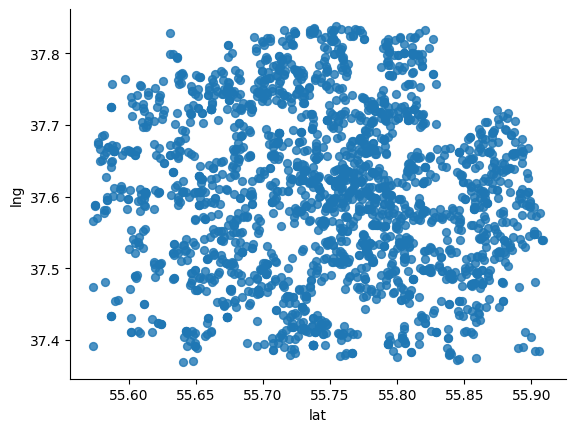

In [99]:
# @title lat vs lng

from matplotlib import pyplot as plt
within_mkad.plot(kind='scatter', x='lat', y='lng', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

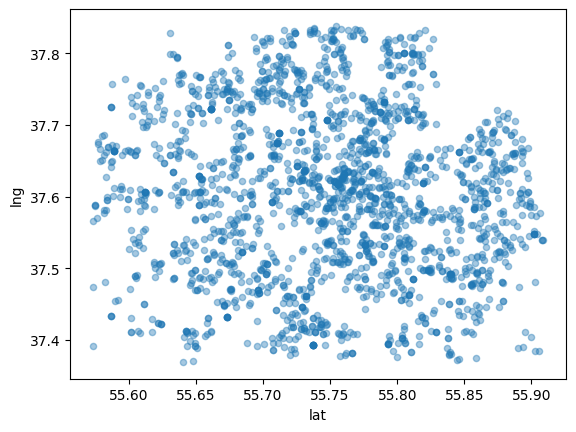

In [100]:
plt.scatter(
            within_mkad['lat'],
            within_mkad['lng'],
            s=20,
            alpha=0.4,
           )
plt.ylabel("lng")
plt.xlabel("lat")
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [107]:
import plotly.express as px

fig = px.scatter_mapbox(within_mkad, lat="lat", lon="lng", hover_name="profession", hover_data=["employer"], height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Пятёрочке очень нужны пекари.

В массажисты берут даже фармацевтов, стоит уточнить запрос при поиске.

В заповедниках данные специальности оказались невостребованными

Вероятно, ближе к центру плотность возрастает, но на графике этого не видно.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [29]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 169MB/s]


Создадим DataFrame:

In [30]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [31]:
diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [32]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [33]:
diamonds['total_sales_price']

0             200
1             200
2             200
3             200
4             200
           ...   
219698    1210692
219699    1292500
219700    1315496
219701    1350000
219702    1449881
Name: total_sales_price, Length: 219703, dtype: int64

In [34]:
print(diamonds['total_sales_price'].idxmin(), diamonds['total_sales_price'].min())
print(diamonds['total_sales_price'].idxmax(), diamonds['total_sales_price'].max())

0 200
219702 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [35]:
diamonds = diamonds.replace('unknown', None)

In [36]:
diamonds.isnull().sum().sum()

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [37]:
none_counts = diamonds.isnull().sum()
none_counts[none_counts != 0].index

Index(['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition',
       'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity',
       'fancy_color_dominant_color', 'fancy_color_secondary_color',
       'fancy_color_overtone', 'fancy_color_intensity'],
      dtype='object')

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [38]:
columns = list(diamonds.keys())
columns

['Unnamed: 0',
 'cut',
 'color',
 'clarity',
 'carat_weight',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity',
 'total_sales_price']

In [39]:
useless_columns = [column for column in columns if column.startswith('fancy_color_') or column.startswith('fluor_')]
len(useless_columns)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [40]:
diamonds[useless_columns].notnull().sum().sum()

111586

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [41]:
diamonds = diamonds[[column for column in columns if column not in useless_columns]]

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [42]:
culet = [column for column in columns if column.startswith('culet_')]
len(culet)

2

In [43]:
diamonds[culet].notnull().sum().sum()

149282

In [44]:
diamonds = diamonds[[column for column in diamonds.keys() if column not in culet]]
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,None,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,None,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,None,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,None,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,None,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,None,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,None,VS2,5.17,None,GIA,Very Good,Very Good,None,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,None,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,None,SI2,0.90,None,GIA,Good,Good,None,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [45]:
diamonds['total_sales_price'].sum() / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [46]:
diamonds[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,None,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,None,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,None,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,None,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,None,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,None,62.1,58.0,14.84,14.91,9.24,None,None,1121792
219696,219697,Oval,H,VS2,18.88,None,GIA,Excellent,Excellent,None,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,None,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,None,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [47]:
diamonds[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,None,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,None,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,None,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,None,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,None,0.0,0.0,0.00,0.00,0.00,None,None,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,None,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,None,I1,0.89,None,GIA,Good,Good,None,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,None,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,None,GIA,Excellent,Excellent,None,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [48]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         219703 non-null  int64  
 1   cut                219703 non-null  object 
 2   color              210541 non-null  object 
 3   clarity            219703 non-null  object 
 4   carat_weight       219703 non-null  float64
 5   cut_quality        159096 non-null  object 
 6   lab                219703 non-null  object 
 7   symmetry           219703 non-null  object 
 8   polish             219703 non-null  object 
 9   eye_clean          62787 non-null   object 
 10  depth_percent      219703 non-null  float64
 11  table_percent      219703 non-null  float64
 12  meas_length        219703 non-null  float64
 13  meas_width         219703 non-null  float64
 14  meas_depth         219703 non-null  float64
 15  girdle_min         136271 non-null  object 
 16  gi

In [49]:
diamonds.select_dtypes('object')

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,None,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,None,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,None,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,None,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,None,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,None,M,STK
219699,Radiant,None,VS2,None,GIA,Very Good,Very Good,None,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,None,TN,M
219701,Princess,None,SI2,None,GIA,Good,Good,None,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [50]:
price = np.array(diamonds['total_sales_price'])
price @ price.T

158540672665477

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [13]:
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


In [19]:
colors = diamonds['color'].unique()
colors

array(['E', 'F', 'L', 'D', 'J', 'I', 'G', 'H', 'M', 'K', 'unknown'],
      dtype=object)

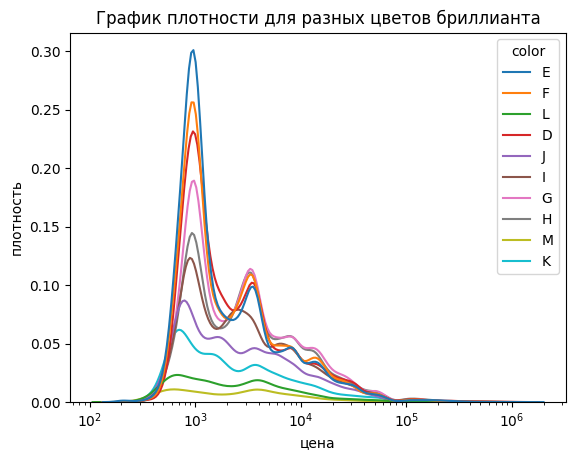

In [62]:
sns.kdeplot(diamonds, x='total_sales_price', hue='color', log_scale=True)
plt.title('График плотности для разных цветов бриллианта')
plt.xlabel('цена')
plt.ylabel('плотность')
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

In [ ]:
# your code here

(2 балла) Постройте график `вес бриллианта - стоимость`:

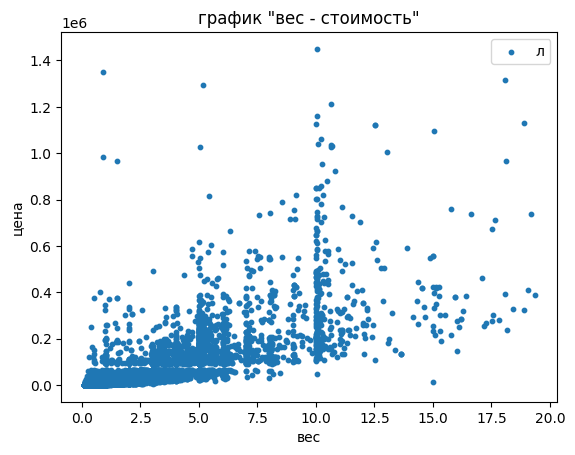

In [157]:
plt.scatter(x=diamonds['carat_weight'],
            y=diamonds['total_sales_price'],
            s=10)
plt.title('график "вес - стоимость"')
plt.xlabel('вес')
plt.ylabel('цена')
plt.legend(labels="легенда")
plt.show()

In [150]:
diamonds.keys()

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'depth_percent',
       'table_percent', 'meas_length', 'meas_width', 'meas_depth',
       'girdle_min', 'girdle_max', 'total_sales_price'],
      dtype='object')

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

In [ ]:
# your code here

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

В основном цена варьируется от тысячи до 10 тысяч долларов. Больше всего бриллиантов цветов D, E, F, меньше всего — M, L.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [64]:
data = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
data.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [67]:
import sklearn as sk
data = sk.utils.shuffle(data)
data

,meas_length,meas_width,meas_depth,total_sales_price
59867,4.36,4.39,2.72,998
197092,7.71,7.72,4.68,13975
194072,7.06,7.09,4.28,12321
112376,6.21,4.41,2.84,2114
218026,12.98,8.57,5.13,58061
...,...,...,...,...
20904,5.83,3.38,2.16,738
179983,6.38,6.42,3.93,8091
168856,5.48,5.36,3.96,6143
210183,8.48,6.07,4.28,26374


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [76]:
minkowski = (np.abs(data['meas_length'])**3 + np.abs(data['meas_width'])**3 + np.abs(data['meas_depth'])**3)**(1/3)
minkowski

59867      5.724691
197092    10.069242
194072     9.231443
112376     7.034897
218026    14.344034
            ...    
20904      6.273013
179983     8.363455
168856     7.247324
210183     9.697089
215080    13.792994
Length: 219703, dtype: float64

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [77]:
df2 = pd.DataFrame({ 'minkowski' : minkowski, 'price' : data['total_sales_price']})
df2

,minkowski,price
59867,5.724691,998
197092,10.069242,13975
194072,9.231443,12321
112376,7.034897,2114
218026,14.344034,58061
...,...,...
20904,6.273013,738
179983,8.363455,8091
168856,7.247324,6143
210183,9.697089,26374


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2['minkowski'], df2['price'], test_size=0.2)

In [79]:
x_train

123280     6.489464
218277    11.386559
73059      5.945797
175684     7.500954
161778     8.226496
            ...    
89000      5.855687
145018     6.518298
91144      5.605536
16898      5.080163
112533     6.442936
Name: minkowski, Length: 175762, dtype: float64

In [80]:
x_test

114447    6.684018
189275    8.797196
194185    9.627984
8795      5.601185
133722    6.662513
            ...   
175396    8.209345
83463     5.889788
82855     6.164875
47272     5.709196
43528     5.267155
Name: minkowski, Length: 43941, dtype: float64

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

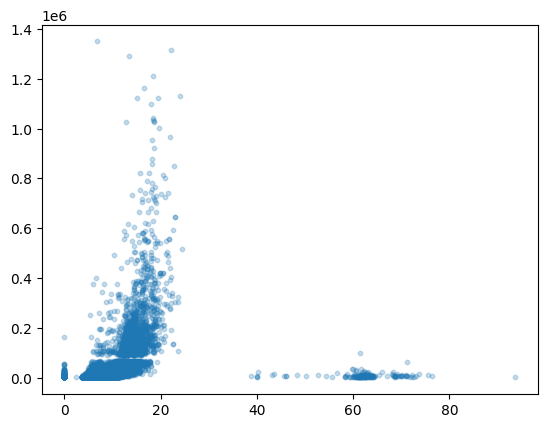

In [87]:
plt.scatter(x_train, y_train, s=10, alpha=0.25)
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

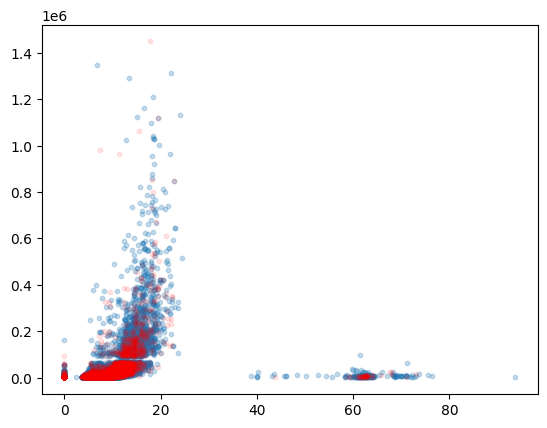

In [90]:
plt.scatter(x_train, y_train, s=10, alpha=0.25)
plt.scatter(x_test, y_test, s=10, alpha=0.10, c='red')
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [91]:
from sklearn.neighbors import NearestNeighbors

In [105]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(x_train.to_frame(), y_train.to_frame())

NearestNeighbors(n_neighbors=1)

In [114]:
indexes = neigh.kneighbors(x_test.to_frame(), return_distance=False)
indexes = np.reshape(indexes, (indexes.size,))
indexes

array([116454,  74550, 110958, ...,  11658,  18291, 138433])

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [138]:
predictions = df2['price'].loc[indexes]
predictions = predictions.reset_index(drop=True)
predictions

0        2160
1        1092
2        2054
3         306
4         854
         ... 
43936    1150
43937    1008
43938     648
43939     700
43940    3296
Name: price, Length: 43941, dtype: int64

In [141]:
percent = predictions / y_test.reset_index(drop=True)
percent

0        0.980036
1        0.107852
2        0.165699
3        0.516892
4        0.283533
           ...   
43936    0.167981
43937    0.834437
43938    0.540000
43939    0.772627
43940    3.670379
Name: price, Length: 43941, dtype: float64

In [148]:
np.abs(percent - 1)

0        0.019964
1        0.892148
2        0.834301
3        0.483108
4        0.716467
           ...   
43936    0.832019
43937    0.165563
43938    0.460000
43939    0.227373
43940    2.670379
Name: price, Length: 43941, dtype: float64

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)